In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np

In [2]:
df = pd.read_csv("./fraud test.csv")

In [3]:
df.shape

(555719, 23)

In [4]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
df.isnull().value_counts

<bound method DataFrame.value_counts of         Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0            False                  False   False     False     False  False   
1            False                  False   False     False     False  False   
2            False                  False   False     False     False  False   
3            False                  False   False     False     False  False   
4            False                  False   False     False     False  False   
...            ...                    ...     ...       ...       ...    ...   
555714       False                  False   False     False     False  False   
555715       False                  False   False     False     False  False   
555716       False                  False   False     False     False  False   
555717       False                  False   False     False     False  False   
555718       False                  False   False     False     False  False   


# EDA 


In [7]:
import matplotlib.pyplot as plt

In [10]:
df.drop("Unnamed: 0", axis = 1, inplace =True)

In [11]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,31/12/2020 23:59,3.056060e+13,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,13/02/1966,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,31/12/2020 23:59,3.556610e+15,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,27/12/1999,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,31/12/2020 23:59,6.011720e+15,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,29/11/1981,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,31/12/2020 23:59,4.079770e+12,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,15/12/1965,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [16]:
df['city'].value_counts()

Birmingham                   2423
Meridian                     2229
Phoenix                      2222
Utica                        2204
San Antonio                  2182
Warren                       1985
Cleveland                    1968
Conway                       1961
Thomas                       1937
Fulton                       1864
Brandon                      1800
Indianapolis                 1765
Arcadia                      1754
Houston                      1697
Naples                       1694
Burbank                      1672
Philadelphia                 1596
Fort Washakie                1589
Hudson                       1576
Orient                       1548
Huntsville                   1543
Detroit                      1540
Washington                   1517
Dallas                       1512
Andrews                      1508
Lakeland                     1485
Allentown                    1480
Clarks Mills                 1474
Lahoma                       1470
Edisto Island 

In [17]:
df['state'].value_counts()

TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: state, dtype: int64

In [20]:
df['job'].unique()

array(['Mechanical engineer', 'Sales professional, IT',
       'Librarian, public', 'Set designer', 'Furniture designer',
       'Psychotherapist', 'Therapist, occupational',
       'Development worker, international aid', 'Advice worker',
       'Barrister', 'Pensions consultant', 'Freight forwarder',
       'Paramedic', 'Building surveyor', 'Materials engineer',
       'Commercial horticulturist', 'Town planner',
       'Radiographer, therapeutic', 'Surveyor, rural practice',
       'Energy manager', 'Prison officer',
       'Museum/gallery exhibitions officer', 'Media planner',
       'Seismic interpreter', 'Learning disability nurse',
       'Buyer, industrial', 'Scientific laboratory technician',
       'Counselling psychologist', 'Scientist, biomedical',
       'Audiological scientist', 'Stage manager',
       'Leisure centre manager', 'Community pharmacist', 'Risk analyst',
       'Clinical research associate', 'Librarian, academic',
       'Editor, magazine features', 'Ceramics

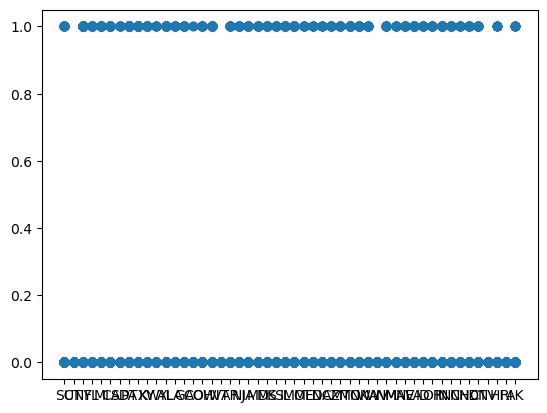

In [25]:
plt.scatter(df['state'],df['is_fraud'])